In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

#System
import os
print(os.listdir("E:/Jupyter/Internship/"))

['.ipynb_checkpoints', '64x64_conversion.ipynb', 'Dark_Image_Detection.ipynb', 'dataset_in_{.npy}.ipynb', 'Explainations', 'Face_clipping.ipynb', 'Face_Detection_using_MTCNN.ipynb', 'Face_Detection_using_Retina_face.ipynb', 'FR_Model.ipynb', 'Images for Facial Recognition', 'Learning.py', 'Live_Tiles_Detection.ipynb', 'Material', 'Recognize.py', 'Results', 'RGB2GRAY.ipynb', 'Speech_based_emotion_recognition.ipynb', 'Split', 'Splitting_Image.ipynb', 'target_numpy.ipynb', 'TESS', 'Trash', 'Tufu', 'tufu_faces.npy', 'tufu_faces_target.npy', 'Video-2-Frames', 'Videos_2_frames.ipynb']


In [2]:
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


## **Dataset**

Brief information about Tufts Dataset:

    There are fourteen different image of each of 103 distinct people
    There are 1442 face images in the dataset
    The images are gray level
    Size of each image is 64x64
    Image pixel values were scaled to [0, 1] interval
    Names of 103 people were encoded to an integer from 0 to 102


In [4]:
data=np.load("E:/Jupyter/Internship/tufu_faces.npy")
target=np.load("E:/Jupyter/Internship/tufu_faces_target.npy")
#target = target.transpose()
#print (target)
#converting target into 1D
#target = target.flatten()
#print (target)
print (data.shape)
print (target.shape)

(1442, 64, 64)
(1442,)


Let's verify above information

In [5]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 1442 images in the dataset
There are 103 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.25490196 0.25490196 0.25490196 0.25490196]


In [6]:
print("unique target number:",np.unique(target))

unique target number: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102]


###  **Show 103 Disticnt People in the Tufts Dataset**

In [7]:
def show_103_distinct_people(images, unique_ids):
    #Creating 7X15 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=7, ncols=15, figsize=(18, 9))
    #For easy iteration flattened 7X15 subplots matrix to 105 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*14
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 103 distinct people in the dataset")

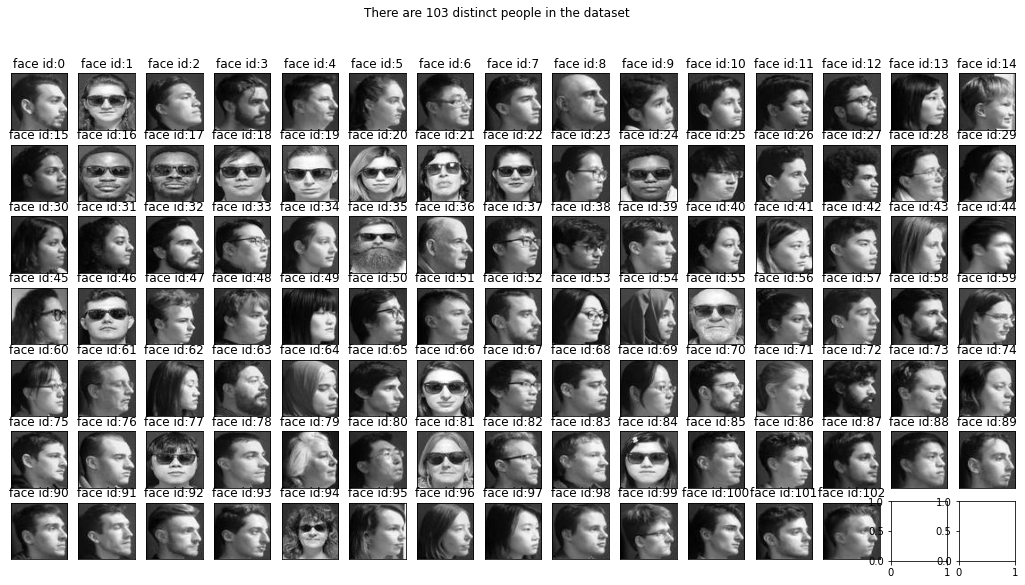

In [8]:
show_103_distinct_people(data, np.unique(target))

### **Show 14 Face Images of Selected Target** 

In [9]:
def show_14_faces_of_n_subject(images, subject_ids):
    cols=14 # each subject has 10 distinct face images
    rows=(len(subject_ids)*14)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*14 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

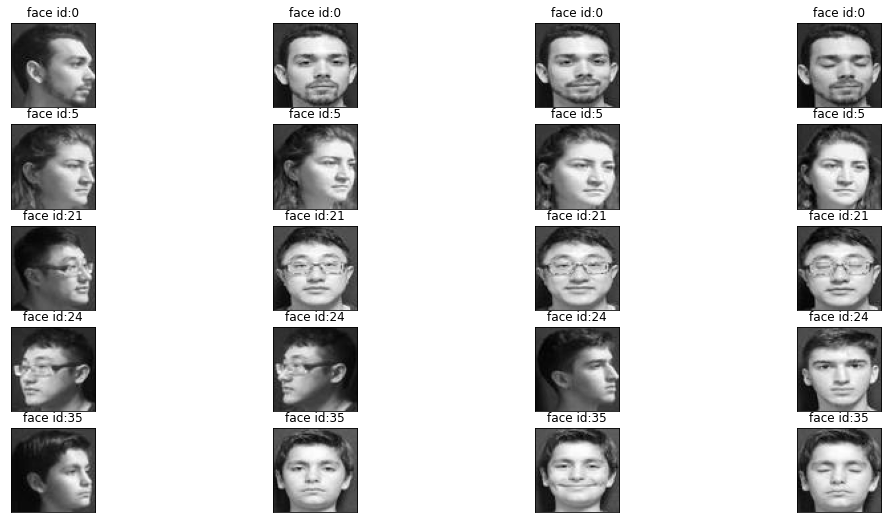

In [10]:
#You can playaround subject_ids to see other people faces
show_14_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 35])

### **Machine Learning Model fo Face Recognition**

Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.

In [11]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print(X)
print("X shape:",X.shape)

[[0.25490196 0.25490196 0.25490196 ... 0.25098039 0.2627451  0.23137255]
 [0.2        0.20392157 0.20392157 ... 0.19215686 0.18823529 0.18823529]
 [0.20392157 0.20392157 0.20392157 ... 0.19607843 0.20784314 0.2       ]
 ...
 [0.22352941 0.20392157 0.20392157 ... 0.14509804 0.13333333 0.12941176]
 [0.17647059 0.17647059 0.17254902 ... 0.12156863 0.11764706 0.09019608]
 [0.17647059 0.17647059 0.17647059 ... 0.08627451 0.08235294 0.08235294]]
X shape: (1442, 4096)


### **Split data and target into Random train and test Subsets** 

The data set contains 14 face images for each subject. Of the face images, 78 percent will be used for training, 22 percent for testing. Uses stratify feature to have equal number of training and test images for each subject. Thus, there will be 10-11 training images and 2-3 test images for each subject. You can play with training and test rates.

In [43]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.22, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (1124, 4096)
y_train shape:(1124,)


<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

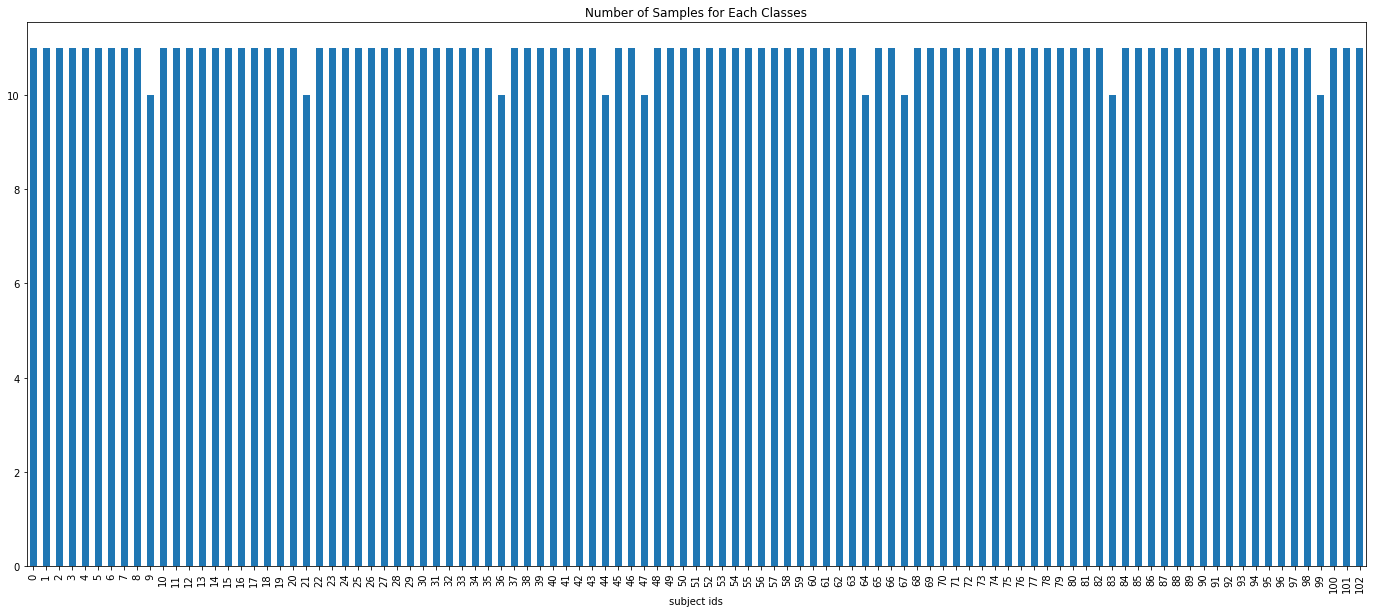

In [44]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(24,10),title="Number of Samples for Each Classes")

### **Principle Component Analysis**

Machine learning methods are divided into two: supervised learning and unsupervised learning. In supervised learning, the data set is divided into two main parts: 'data' and 'output'. The data holds the values of the sample in the data set, while the 'output' holds the class (for classification) or the target value (for regression). In unsupervised learning, the data set consists of only the data section.

Non-supervised learning is generally divided into two: data transformation and clustering. In this study, the transformation of the data will be carried out using unsupervised learning. Unsupervised transformation methods allow for easier interpretation of data by computers and people.

The most common unsupervised transformation  applications is to reduce data size. In the size reduction process, the dimension of the data reduced. 

Principle Component Analysis (PCA) is a method that allows data to be represented in a lesser size. According to this method, the data is transformed to new components and the size of the data is reduced by selecting the most important components.

In [45]:
import mglearn

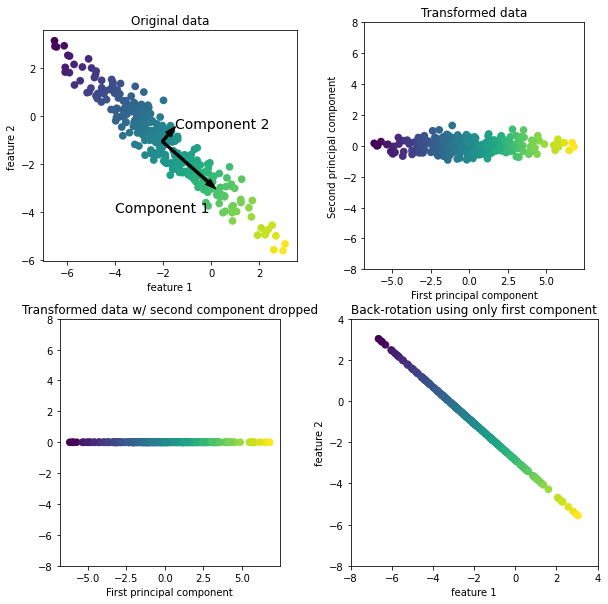

In [47]:
mglearn.plots.plot_pca_illustration()

The above illustration shows a simple example on a synthetic two-dimensional data set. The first drawing shows the original data points colored to distinguish points. The algorithm first proceeds by finding the direction of the maximum variance labeled "Component 1". This refers to the direction in which most of the data is associated, or in other words, the properties that are most related to each other.

Then, when the algorithm is orthogonal (at right angle), it finds the direction that contains the most information in the first direction. There are only one possible orientation in two dimensions at a right angle, but there will be many orthogonal directions (infinite) in high dimensional spaces.

In [48]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

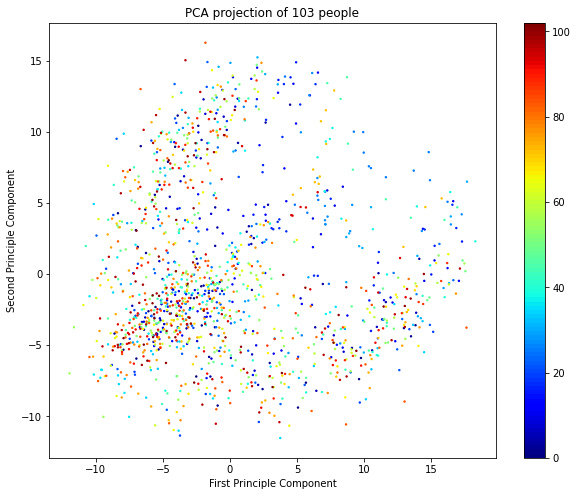

In [49]:
number_of_people=103
index_range=number_of_people*14
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=2,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

### **Finding Optimum Number of Principle Component**

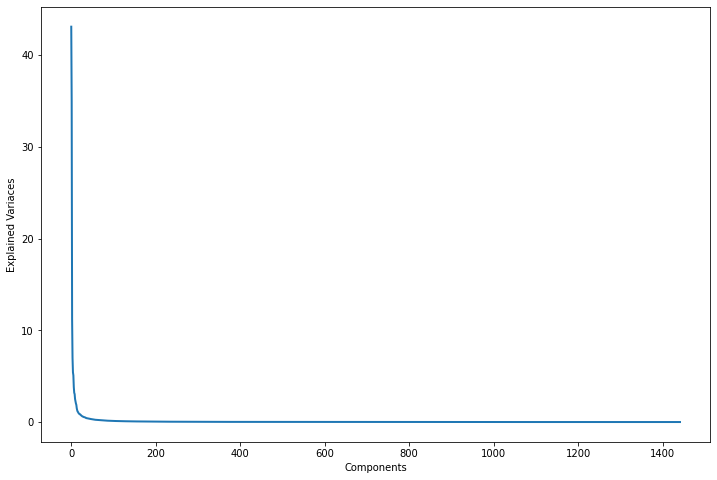

In [50]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [122]:
n_components=116

In [123]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=116, whiten=True)

### **Show Average Face**

Text(0.5, 1.0, 'Average Face')

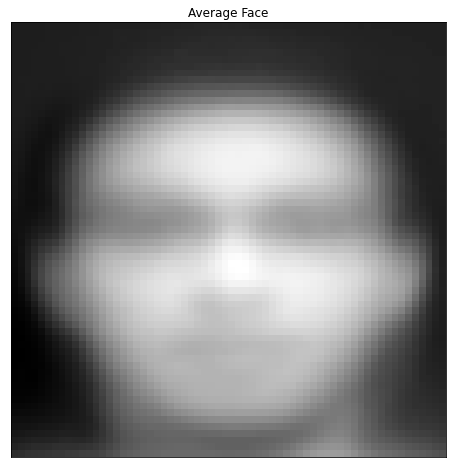

In [124]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

### **Show Eigen Faces**

Text(0.5, 0.98, 'All Eigen Faces')

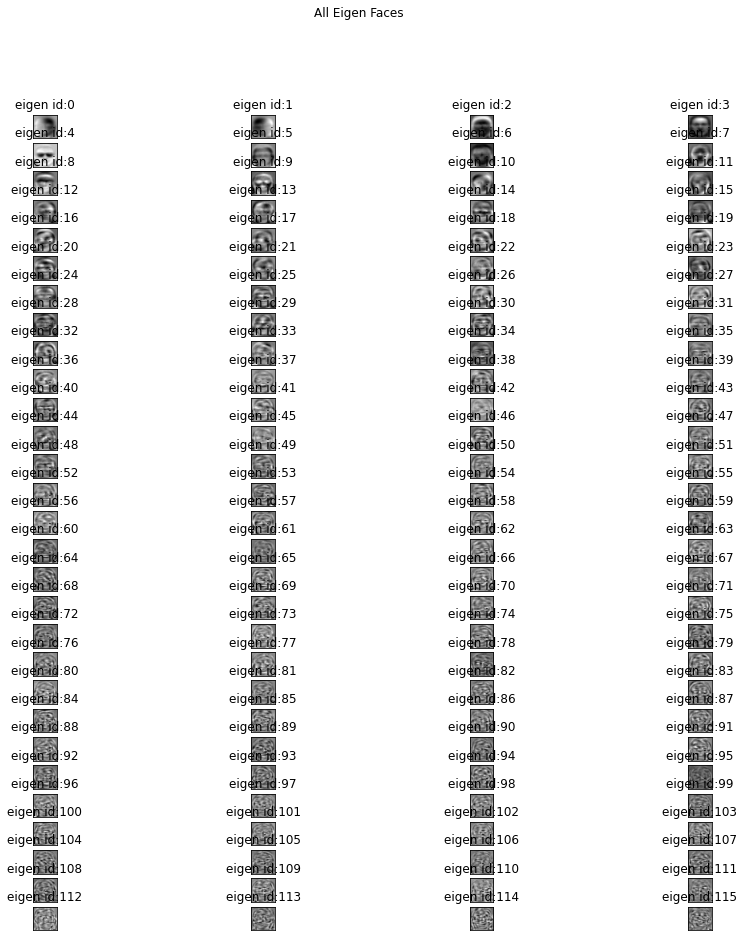

In [125]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=4
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(5*"=", 5*"="))

### **Classification Results**

In [126]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [127]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.65


<AxesSubplot:>

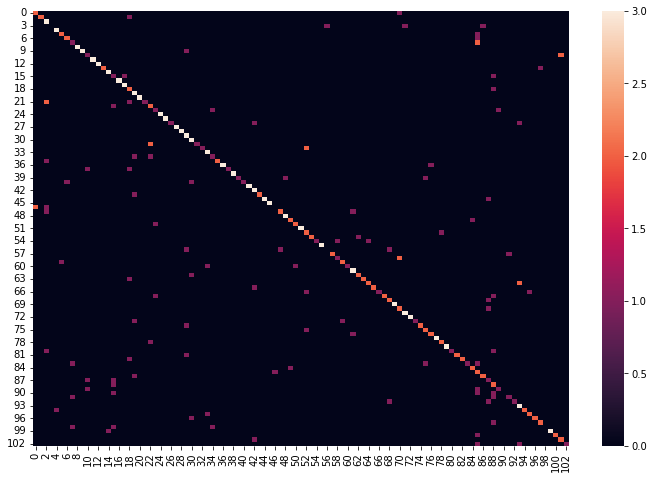

In [128]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [129]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       1.00      0.67      0.80         3
           2       0.33      1.00      0.50         3
           3       0.00      0.00      0.00         3
           4       0.75      1.00      0.86         3
           5       0.67      0.67      0.67         3
           6       0.67      0.67      0.67         3
           7       0.25      0.33      0.29         3
           8       1.00      1.00      1.00         3
           9       1.00      0.75      0.86         4
          10       0.25      0.33      0.29         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       0.75      1.00      0.86         3
          15       0.17      0.33      0.22         3
          16       1.00      1.00      1.00         3
          17       0.75    

### **More  Results** 

We can get accuracy results of state of the art machine learning model.

In [130]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.79

========== LR RESULT ==========
Accuracy score:0.66

========== NB RESULT ==========
Accuracy score:0.61

========== KNN RESULT ==========
Accuracy score:0.47

========== DT RESULT ==========
Accuracy score:0.26

========== SVM RESULT ==========
Accuracy score:0.65



According to the above results, Linear Discriminant Analysis and Logistic Regression seems to have the best performances.

### **Validated Results**

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.76
LR mean cross validations score:0.62
NB mean cross validations score:0.49
KNN mean cross validations score:0.41
DT mean cross validations score:0.22
SVM mean cross validations score:0.54


In [132]:
lr=LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred=lr.predict(X_test_pca)
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy score:0.79


<AxesSubplot:>

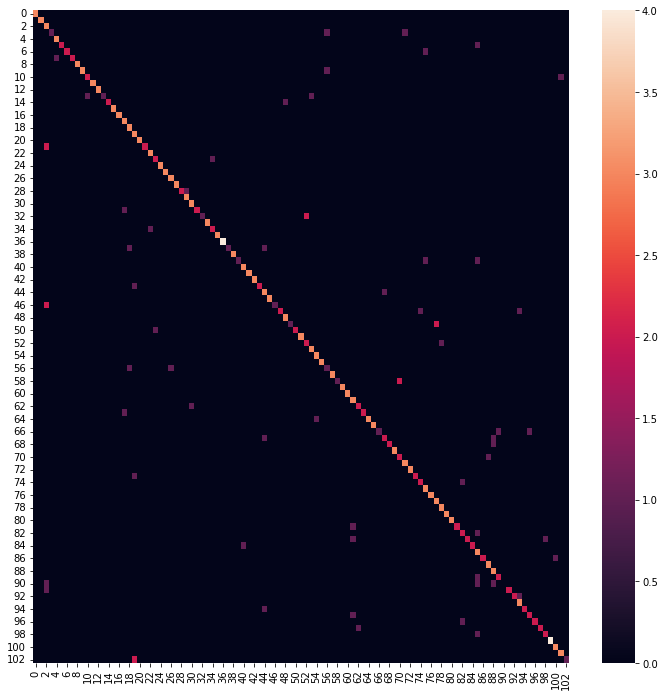

In [133]:
cm=metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [134]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       0.33      1.00      0.50         3
           3       1.00      0.33      0.50         3
           4       0.75      1.00      0.86         3
           5       1.00      0.67      0.80         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      0.75      0.86         4
          10       0.67      0.67      0.67         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      0.33      0.50         3
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

### **More Validated Results: Leave One Out vross-validation**

The dataset contains 14 face images for each subject. This is a small number for training and testing machine learning models. There is a recommended cross-validation method for better assessment of machine learning models where there are few examples of classes: Leave One Out cross validation. In the LOO approach, only one of the samples of a class is used for testing. Others are used for training. This procedure is repeated until each sample is used for testing.

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LogisticRegression()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LinearDiscriminantAnalysis()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

### **Hyperparameter Tunning: GridSearcCV**

We can do GridSearchCV to improve model generalization performance. To that we will tune the hyperparameters of Logistic Regression classifier. 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import LeaveOneOut

#This process takes long time. You can use parameter:{'C': 1.0, 'penalty': 'l2'} 
#grid search cross validation score:0.93
"""
params={'penalty':['l1', 'l2'],
                'C':np.logspace(0, 4, 10)
                }
clf=LogisticRegression()
#kfold=KFold(n_splits=3, shuffle=True, random_state=0)
loo_cv=LeaveOneOut()
gridSearchCV=GridSearchCV(clf, params, cv=loo_cv)
gridSearchCV.fit(X_train_pca, y_train)
print("Grid search fitted..")
print(gridSearchCV.best_params_)
print(gridSearchCV.best_score_)
print("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))
"""

In [ ]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_pca, y_train)
print("lr score:{:.2f}".format(lr.score(X_test_pca, y_test)))

### **Precision-Recall-ROC Curves**

Precision-recall curves are for binary classification. In the dataset, there are 103 distinct classes. Dont worry, sklearn allows us to illustrate the precision-recall in multi-label settings

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Target=label_binarize(target, classes=range(103))
print(Target.shape)
print(Target[0])

n_classes=Target.shape[1]

In [ ]:
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass=train_test_split(X, 
                                                                                              Target,
                                                                                             test_size=0.3,
                                                                                             stratify=Target,
                                                                                     random_state=0)

In [ ]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca=pca.transform(X_train_multiclass)
X_test_multiclass_pca=pca.transform(X_test_multiclass)

In [ ]:
oneRestClassifier=OneVsRestClassifier(lr)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score=oneRestClassifier.decision_function(X_test_multiclass_pca)

In [ ]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i],
                                                        y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(),
    y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

In [ ]:
from sklearn.utils.fixes import signature

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(1, figsize=(12,8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

### **Linear Discriminant Analysis İle Boyut Azaltma**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit(X_train, y_train).transform(X_train)
X_test_lda=lda.transform(X_test)

In [ ]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_lda,y_train)
y_pred=lr.predict(X_test_lda)

In [ ]:
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

### **Machine Learning Automated Workflow: Pipeline**

Application of machine learning on data sets has a standard workflow. Sklearn offers the Pipeline object to automate this workflow. Pipeline allows standard work flows for performing machine learning operations such as scaling, feature extraction and modeling. The Pipeline guarantees the same operation in the entire data set, ensuring that the training and test data are consistent.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
work_flows_std = list()
work_flows_std.append(('lda', LinearDiscriminantAnalysis(n_components=n_components)))
work_flows_std.append(('logReg', LogisticRegression(C=1.0, penalty="l2")))
model_std = Pipeline(work_flows_std)
model_std.fit(X_train, y_train)
y_pred=model_std.predict(X_test)

In [ ]:
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))